<h1 align="center">Física Computacional.</h1>
<h1 align="center">Semestre 2015-1</h1>

<h2>Sergio A. Alcalá Corona </h2> 

---
### Rodrigo Vega Vilchis
### Joel Gómez Uribe
---

<h1 align="center" font-weight="bold">Tarea-Práctica 5. <br>Métodos numéricos básicos en física computacional</h1> 
<h2 align="center">Integración numérica</h2> 
<hr>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import jv

plt.rcParams.update({
    "text.usetex": True,
})

<h2>1. Regla del trapecio</h2>

<h2>Calcular la distancia aproximada recorrida</h2>

In [2]:
tiempo, velocidad = np.genfromtxt("velocidades.txt", unpack=True, dtype=None)

In [3]:
def distancias(velocidades):
    N = len(velocidades) - 1 # Divisones
    a = tiempo[0] # Inicio de intervalo
    b = tiempo[-1] # Final de intervalo

    # Cálculo de la distancia total usando la regla del trapecio
    def trapezoidal_rule(a, b, N):
        h = (b - a) / N # Alto
        idx = [int(a + k * h) for k in range(0, N + 1)]
    
        ## 0.5(f(a) + f(b))
        distancia_total = (velocidades[a] + velocidades[b]) * .5
    
        ## suma de f(a + k*h) con k= 1 hasta k=N-1
        for k in range(1, N):
            distancia_total += velocidades[idx[k]]
    
        ## h * [0.5(f(a) + f(b)) + sum(f(a + k*h))]
        return h * distancia_total

    
    ## Cálculo de las posiciones
    posiciones = [0]
    
    for i in range(N):
        distancia = trapezoidal_rule(i, i + 1, N)
        posiciones.append(posiciones[-1] + distancia) # Posición anterior + posición actual

    return trapezoidal_rule(a, b, N), posiciones

In [4]:
distancia_total, posiciones = distancias(velocidad)
print(f"La distancia aproximada recorrida por la partícula fue de {distancia_total} m")
print(f"La distancia aproximada recorrida por la partícula fue de {distancia_total:.2f} m")

La distancia aproximada recorrida por la partícula fue de 8.218924000000017 m
La distancia aproximada recorrida por la partícula fue de 8.22 m


<h2>Graficar velocidad y distancia en función del tiempo</h2>

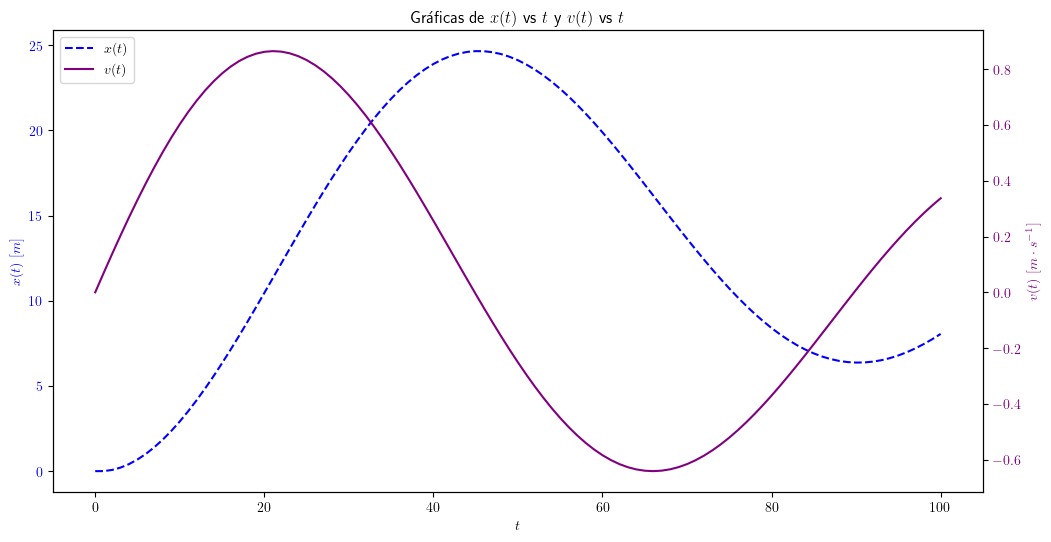

In [5]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(tiempo, posiciones, "--", label="$x(t)$", color="blue")
ax1.set_ylabel("$x(t)\\ [m]$", color="b")
ax1.set_xlabel("$t$")
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()
ax2.set_ylabel("$v(t)\\ [m\\cdot s^{-1}]$", color="purple")
ax2.plot(tiempo, velocidad, label="$v(t)$", color="purple")
ax2.tick_params(axis='y', labelcolor="purple")

# Combinar las leyendas de ambos ejes
x_t, label_x = ax1.get_legend_handles_labels()
v_t, label_v = ax2.get_legend_handles_labels() 
ax1.legend(x_t + v_t, label_x + label_v, loc="upper left")

plt.title("Gráficas de $x(t)$ vs $t$ y $v(t)$ vs $t$")
plt.show()

<h2>2. Integración numérica</h2>

<h3>Calcular valor aproximado de integral</h3>

Escribe un valor aproximado para la integral

\begin{equation*}
    \int_{0}^{2}(x^{2} - 2x + 1)\text{d}x,
\end{equation*}

utilizando la <strong>regla del trapecio</strong>, como la <strong>regla de Simpson</strong> con 10 divisiones.

In [6]:
def trapezium_rule(a, b, N, f):
    h = (b - a) / N
    area = (f(a) + f(b)) * .5

    for k in range(1, N): # Hasta N - 1
        area += f(a + k*h)
    return h * area

def simpson_rule(a, b, N, f):
    h = (b - a) / N
    s_extremos = f(a) + f(b)
    s_par = 0
    s_impar = 0

    # Suma de los términos pares
    for k in range(1, int(N/2)): # N/2 - 1
        s_par += 2*f(a + 2*k*h)

    # Suma de los términos impares
    for k in range(1, int(N /2) + 1): # N/2
        s_impar += 4*f(a + (2*k - 1)*h)
    
    
    return (h / 3) * (s_extremos + s_par + s_impar)

In [7]:
f = lambda x: x**4 - 2*x + 1

# Parámetros
a, b = 0, 2
N = 10

val_trapecio = trapezium_rule(a, b, N, f) 
val_simpson = simpson_rule(a, b, N, f)

print(f"El valor de la integral usando la regla del trapecio es: {val_trapecio}")
print(f"El valor de la integral usando la regla de Simpson es: {val_simpson}")

El valor de la integral usando la regla del trapecio es: 4.50656
El valor de la integral usando la regla de Simpson es: 4.400426666666667


<h3>Comparar resultados</h3>
Ejectura y compara tu resultado con el valor correcto conocido de 4.4 ¿Cuál es el error en tu cálculo?

In [8]:
(1 - 4.4 / trapezium_rule(a, b, N, f)) * 100

2.3645530071717658

In [9]:
(1 - 4.4 / simpson_rule(a, b, N, f)) * 100

0.009696029475936285

<div class="alert-block alert-success" style="font-size:11pt;font-weight:bold">
    El error del valor obtenido mediante la regla del trapecio es de aproximadamente $2\ \%$, mientras que el obtenido por la regla de Simpson es casi nulo, $0.01\ \%$.
</div>

<h3>Más divisiones</h3>

Modifica el programa para utilizar 100 divisiones y luego 1000. ¿Cómo mejora el resultado? ¿Cómo se comparan los resultados entre ambas reglas al usar la misma cantidad de divisiones?

In [10]:
f = lambda x: x**4 - 2*x + 1

# Parámetros
a, b = 0, 2

for div in [100, 1000]:
    val_trapecio = trapezium_rule(a, b, div, f)
    val_simpson = simpson_rule(a, b, div, f)
    
    print(f"Valor para {div} divisiones.")
    print(f"Valor por regla del trapecio: {val_trapecio}")
    print(f"Valor por regla del trapecio: {val_simpson}")
    print(f"Error del cálculo:")
    print(f"El error por regla de trapecio es de {(1 - 4.4/val_trapecio) * 100:.4f} %")
    print(f"El error por regla de Simpson es de {(1 - 4.4/val_simpson) * 100} %")
    print("-" * 50)
        

Valor para 100 divisiones.
Valor por regla del trapecio: 4.401066656
Valor por regla del trapecio: 4.400000042666668
Error del cálculo:
El error por regla de trapecio es de 0.0242 %
El error por regla de Simpson es de 9.69696978270207e-07 %
--------------------------------------------------
Valor para 1000 divisiones.
Valor por regla del trapecio: 4.400010666665601
Valor por regla del trapecio: 4.400000000004267
Error del cálculo:
El error por regla de trapecio es de 0.0002 %
El error por regla de Simpson es de 9.697798120100742e-11 %
--------------------------------------------------


<div class="alert-block alert-success" style="font-weight:bold">
    Notamos que al aumentar las divisiones el valor obtenido por ambos métodos se vuelve casi nulo. Usando la regla del trapecio se obtienen errores de $2\ \%,\ 0.02\ \%$ y $0.0002\ \%$, mientras que el error obtenido usando la regla de Simpson pasa de $0.01\ \%$ a ser casi nulo. Por lo que si deseamos obtener un valor bastante acertado deberías optar por usar la regla de Simpson, incluso para un número pequeño de divisiones el resultado es funcional.
</div>

<h2>3. El límite de difracción de un telescopio</h2>

La intensidad de la luz en este patrón de difracción está dada por:

\begin{equation*}
    I(r) = \Bigl(\dfrac{J_{1}(kr)}{kr}\Bigr)^{2},
\end{equation*}

donde $r$ es la distancia en el plano focal desde el centro del patrón de difracción, $k = 2\pi / \lambda$ y $J_{1}(x)$ es una función de Bessel. Las funciones de Bessel $J_{m}(x)$ están dadas por:

\begin{equation*}
    J_{m}(x) = \dfrac{1}{\pi}\int_{0}^{\pi}\cos(m\theta - x\sin\theta)\text{d}\theta,
\end{equation*}

donde $m$ es un entero no negativo y $x \geq 0$.

<h3>Función $J(m, x)$</h3>

Escribe una función ``J(m,x)`` que calcule el valor de $J_{m}(x)$ usando la regla de Simpson con $N = 1000$ puntos. Utiliza dicha función en un programa para graficar, en un solo gráfico, las funciones de Bessel $J_{0},\ J_{1}$ y $J_{2}$ como una función de $x$ (de $x = 0$ a $x = 20$).

In [11]:
# Funciones de Bessel
def J(m, x):
    # Párametros
    a, b = 0, np.pi
    N = 1000
    
    f = lambda th: np.cos(m*th - x*np.sin(th))    
    val_int = simpson_rule(a, b, N, f)

    return (1 / np.pi) * val_int  

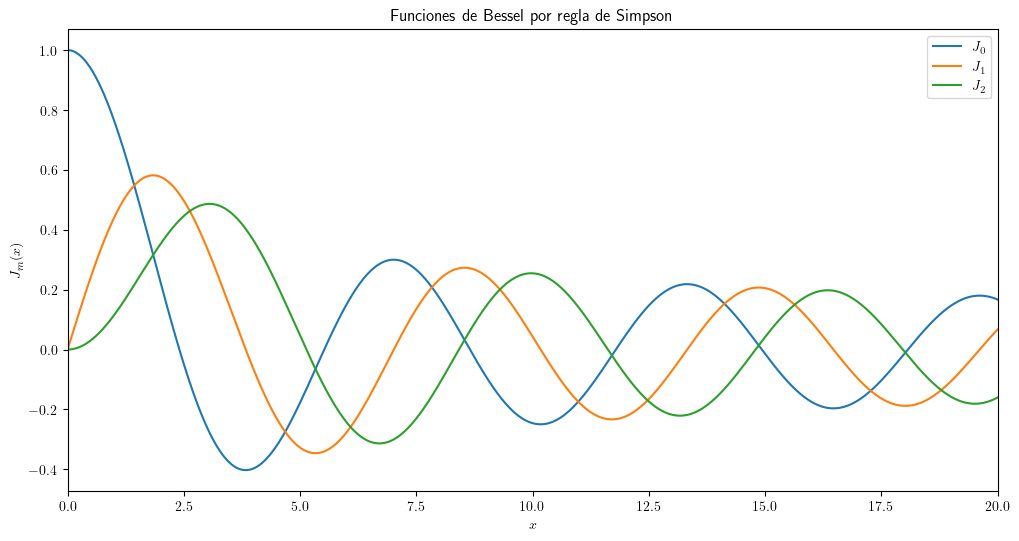

In [12]:
x = np.linspace(0, 20, 1000) # x=0 hasta x=20
labels = ["$J_{0}$", "$J_{1}$", "$J_{2}$"]

plt.figure(figsize=(12, 6))
plt.title("Funciones de Bessel por regla de Simpson")
plt.xlabel("$x$")
plt.ylabel("$J_{m}(x)$")
plt.xlim(0, 20)
for m, label in zip(range(3), labels):
    plt.plot(x, J(m, x), label=label)

plt.legend()
plt.show()

<h3>Comparar resultado con implementación scipy</h3>

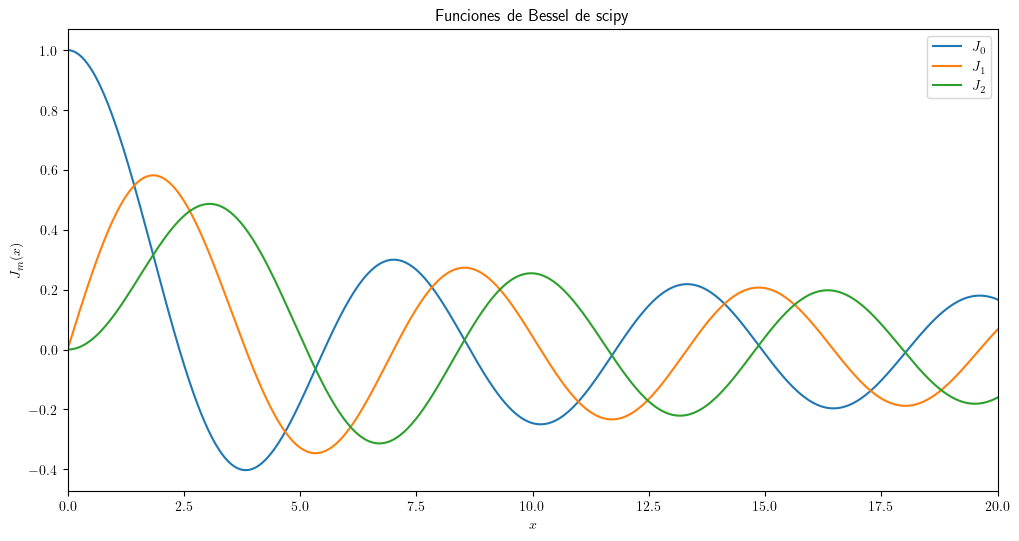

In [13]:
x = np.linspace(0, 20, 1000)
labels = ["$J_{0}$", "$J_{1}$", "$J_{2}$"]

plt.figure(figsize=(12, 6))
plt.title("Funciones de Bessel de scipy")
plt.xlabel("$x$")
plt.ylabel("$J_{m}(x)$")
plt.xlim(0, 20)
for m, label in zip(range(3), labels):
    plt.plot(x, jv(m, x), label=label)

plt.legend()
plt.show()

<h3>Gráfica de densidad</h3>

In [14]:
def intensidad(r, lamb):
    k = (2 * np.pi) / lamb
    return (jv(1, k*r) / (k*r)) ** 2

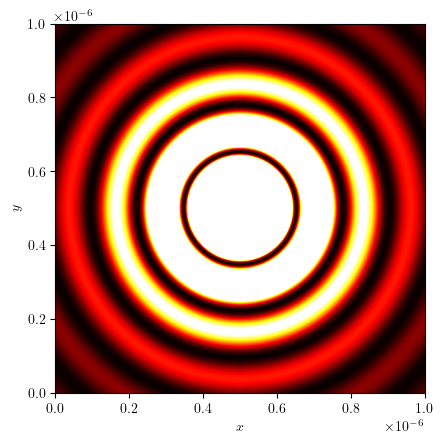

In [15]:
lamb = 500e-9 # nm

x = np.linspace(-1e-6, 1e-6, 1000)
y = np.linspace(-1e-6, 1e-6, 1000)
X, Y = np.meshgrid(x, y)

r = np.sqrt(X**2 + Y**2)

plt.imshow(intensidad(r, lamb), cmap="hot", extent=(0, 1e-6, 0, 1e-6), vmax=0.001)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

<h2>4. Capacidad calorífica de un sólido</h2>

La <em>teoría de sólidos de Debye</em> dice que la <em>capacidad calorífica</em> de un sólido a una temperatura $T$ está dada por:

\begin{equation*}
    C_{V} = 9V\rho k_{B}\Bigl(\dfrac{T}{\theta_{D}}\Bigr)^{3}\int_{0}^{\theta_{D}/T} \dfrac{x^{4}e^{x}}{(e^{x} - 1)^{2}}\ \text{d}x,
\end{equation*}

donde $V$ es el volumen del sólido, $\rho$ es la densidad numérica de los átomos, $k_{B}$ es la constante de Boltzmann y $\theta_{D}$ es la llamada <em>temperatura de Debye</em>, una propiedad de sólidos que depende de su densidad y la velocidad del sonido.

<h3>Función $C_{V}(T)$</h3>

Escrbie una función que calcule $C_{V}$ para un valor dado de temperatura, de una muestra que consta de 1000 centímetros cúbicos de aluminio sólido, con densidad numérica de $\rho = 6.022\times 10^{28}\ \text{m}^{-3}$ y una temperatura de Debye de $\theta_{D} = 428\ \text{K}$. Utiliza la <strong>cuadratura gaussiana</strong> para evaluar la integral, con $N = 50$ <em>puntos muestra</em>.

In [16]:
# Capacidad calorífica
def Cv(T):
    k_B = 1.380649e-23 # Constante de Boltzmann [J / K]
    densidad = 6.022e28 # m^-3
    debye_T = 428 # K
    up_lim = debye_T / T
    const = (T / debye_T) ** 3
    volumen = 1000 # cm^3
    volumen /= 1e6 # Conversión volumen a  m^3
    N = 50 # Puntos muestra

    f = lambda x: ((x**4) * np.exp(x)) / (np.exp(x) - 1)**2

    # Cuadratura de Gauss
    def cuadratura_gaussiana(a, b, N, f):
        x, w = np.polynomial.legendre.leggauss(N)
        
        const_1 = (b - a) / 2
        const_2 = (b + a) / 2
        
        x_prima = const_1 * x + const_2
        w_prima = const_1 * w
        
        suma = 0
        
        for k in range(N):
            suma += w_prima[k] * f(x_prima[k])
    
        return suma

    return 9 * volumen * densidad * k_B * const * cuadratura_gaussiana(0, up_lim, N, f)

<h3>Graficar la capacidad calorífica en función de la temperatura</h3>

Gráfica de la capacidad calorífica en función de la temperatura desde $T = 5\ \text{K}$ hasta $T = 500\ \text{K}$.

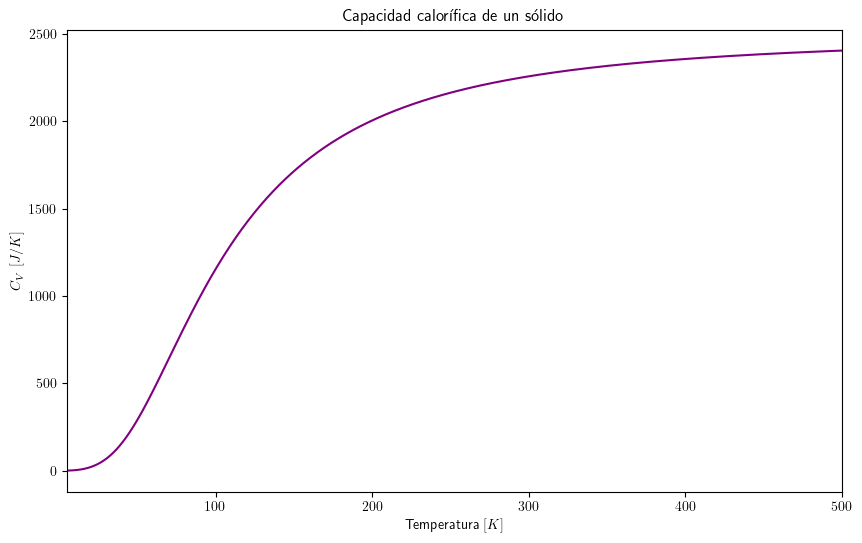

In [17]:
T = np.linspace(5, 500, 1000)
C = [Cv(temp) for temp in T] # Capacidad calorífica para cada temperatura

plt.figure(figsize=(10, 6))
plt.plot(T, C, color="purple")
plt.title("Capacidad calorífica de un sólido")
plt.xlabel("Temperatura $[K]$")
plt.ylabel("$C_{V}\\ [J / K]$")
plt.xlim(T[0], T[-1])
plt.show()

<h2>5. Atracción gravitacional de una lámina uniforme</h2>

La lámina mide $10\ \text{m}$ de lado, tiene un espesor insignificante y una masa de $10$ toneladas.

<h3>Componente de la fuerza</h3>

Considera la fuerza gravitacional debida a la placa que siente una masa puntual de $1\ \text{kg}$ a una distancia $z$ del centro del cuadrado, en dirección perpendicular a la lámina, como se muestra en la figura. Demuestra que la componente de la fuerza a lo largo del eje $z$ es

\begin{equation*}
    F_{z} = G\sigma z \int_{-L/2}^{L/2}\int_{-L/2}^{L/2} \dfrac{\text{d}x\text{d}y}{(x^{2} + y^{2} + z^{2})^{3/2}},
\end{equation*}

donde $G = 6.674\times 10^{-11}\ \text{m}^{3}\text{kg}^{-1}\text{s}^{-2}$ es la constante gravitacional de Newton y $\sigma$ es la masa por unidad de área de la hoja.

<div align="center">
    <img src="https://github.com/user-attachments/assets/dd7bacc1-59a7-4cb7-8eb6-5c98d90d0299">
    <img src="https://github.com/user-attachments/assets/36212245-49a3-4043-920d-8a4c4f99a79f">
</div>

<h3>Calcular y graficar la fuerza</h3>

Calcular y graficar la fuerza en función de $z$, de $z = 0$ hasta $z = 10\ \text{m}$. Para la integral doble utiliza la cuadratura Gaussiana (doble)

\begin{equation*}
    I \simeq \sum_{i = 1}^{N}\sum_{j = 1}^{N}\omega_{i}\omega_{j} f(x_{i}, x_{j}),
\end{equation*}

con $100$ puntos de muestra a lo largo de cada eje.

In [47]:
def force(mass, L, z):
    area = L * L 
    dens_sup = mass / area # Densidad superficial
    G_const = 6.674e-11 # Constante gravitacional de Newton
    f = lambda x, y: 1 / ((x ** 2 + y ** 2 + z ** 2) ** (3 / 2))
    N = 100 # Puntos de muestra
    low_lim = - L / 2 # Límite inferior
    upp_lim = L / 2 # Límite superior

    # Cuadratura de Gauss (doble)
    def cuadratura_gaussiana_doble(a, b, N, f):
        const_1 = (b - a) / 2 
        const_2 = (b + a) / 2 
        
        # Puntos muestra para x e y
        x, w = np.polynomial.legendre.leggauss(N)
        # Pesos normalizados
        x_p, w_p = const_1 * x + const_2, const_1 * w

        suma = 0

        for i, j in enumerate(range(N)):
            suma += w_p[i] * w_p[j] * f(x_p[i], x_p[j])

        return suma

    return G_const * dens_sup * z * cuadratura_gaussiana_doble(low_lim, upp_lim, N, f)

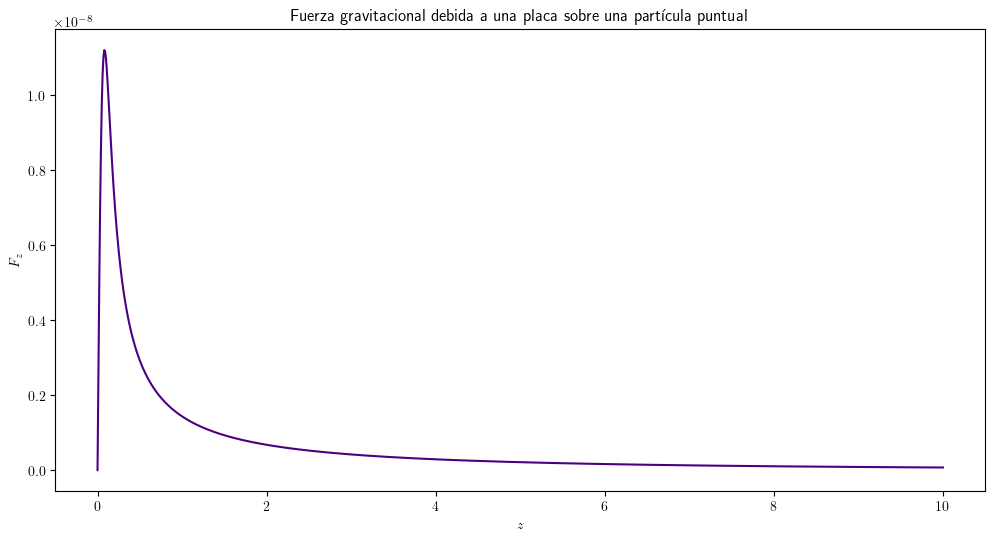

In [48]:
mass = 1e4 # Masa de la placa
L = 10 # Lado de la placa
z = np.linspace(0, 10, 1000)

plt.figure(figsize=(12, 6))
plt.plot(z, force(mass, L, z), color="indigo")
plt.title("Fuerza gravitacional debida a una placa sobre una partícula puntual")
plt.xlabel("$z$")
plt.ylabel("$F_{z}$")
plt.show()

<h3>Explicación sobre comportamiento</h3>

Deberías ver una curva suave, excepto en valores muy pequeños de $z$, donde la fuerza debería caer repentinamente a cero. Esta caída no es un efecto real, sino un artefacto de la forma en que hemos realizado el cálculo. Explica brevemente de dónde viene este artefacto y sugiere una estrategia para elimitarlo, o al menos disminuir su tamaño.

<div class="alert alert-block alert-success">
    Cuando $z \to 0$ la curva cae a repentinamente a cero pues para valores pequeños de $z$ la placa se encontraría prácticamente dentro de la placa ya que estamos despreciando su espesor, por lo que para reducir este efecto deberías considerar un espesor en la placa, así como sumarle un valor $\epsilon$ pequeño a $z$ en el denominador. Si consideramos solo esto último, la expresión para la fuerza se vería como:
</div>
\begin{equation*}
        F_{z} = G\sigma z \int_{-L/2}^{L/2}\int_{-L/2}^{L/2} \dfrac{\text{d}x\text{d}y}{(x^{2} + y^{2} + (z + \epsilon)^{2})^{3/2}}.
    \end{equation*}

In [43]:
def force(mass, L, z):
    area = L * L 
    dens_sup = mass / area # Densidad superficial
    G_const = 6.674e-11 # Constante gravitacional de Newton
    eps = 0.5
    f = lambda x, y: 1 / ((x ** 2 + y ** 2 + (z + eps) ** 2) ** (3 / 2))
    N = 100 # Puntos de muestra
    low_lim = - L / 2 # Límite inferior
    upp_lim = L / 2 # Límite superior

    # Cuadratura de Gauss (doble)
    def cuadratura_gaussiana_doble(a, b, N, f):
        const_1 = (b - a) / 2 
        const_2 = (b + a) / 2 
        
        # Puntos muestra para x e y
        x, w = np.polynomial.legendre.leggauss(N)
        # Pesos normalizados
        x_p, w_p = const_1 * x + const_2, const_1 * w

        suma = 0

        for i, j in enumerate(range(N)):
            suma += w_p[i] * w_p[j] * f(x_p[i], x_p[j])

        return suma

    return G_const * dens_sup * z * cuadratura_gaussiana_doble(low_lim, upp_lim, N, f)

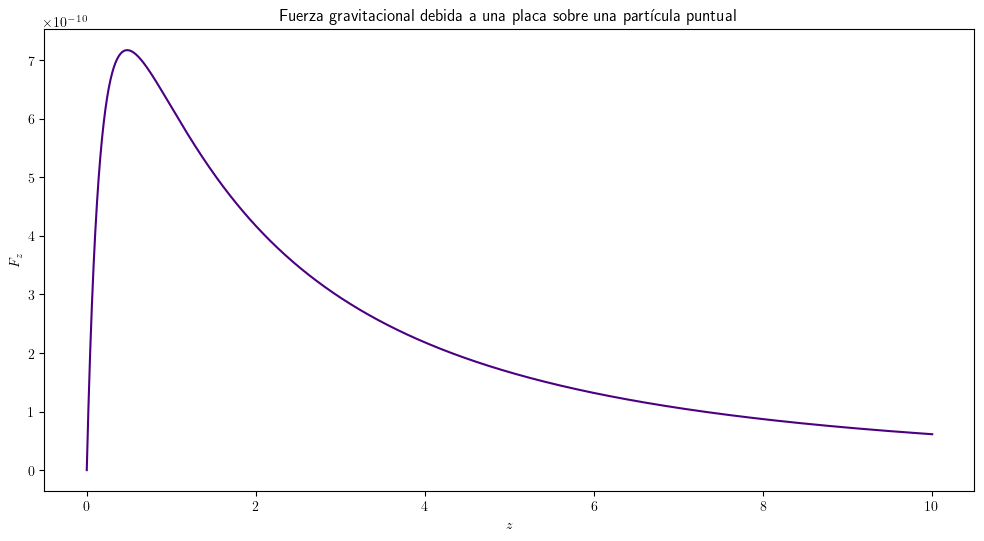

In [45]:
mass = 1e4 # Masa de la placa
L = 10 # Lado de la placa
z = np.linspace(0, 10, 1000)

plt.figure(figsize=(12, 6))
plt.plot(z, force(mass, L, z), color="indigo")
plt.title("Fuerza gravitacional debida a una placa sobre una partícula puntual")
plt.xlabel("$z$")
plt.ylabel("$F_{z}$")
plt.show()